First of all, we import all the necessary libraries.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.datasets import mnist
from keras.utils import np_utils

Using TensorFlow backend.
/home/deeplearning_team6/env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Then, we define the functions to define the model with the correspondent hyperparameters, to plot the accuracy and to plot the loss function. We need to define the number of layers in the network, the kernel size, the stride (how the filter convolves around the input volume), the dropout (to prevent the neural network from overfitting), the activation layer (in this case, Rectified Linear Units 'relu'), the metric to evaluate the model, the number of epochs (one pass of all the training inputs), the batch size (the number of training examples in one forward/backward pass)...
In more detail:
· Stride:  the step size of the convolution operation. The filter slides over the image, stopping at each stride length, and performs the necessary operations. The typical values are between 1 and 3.
· Kernel: It refers to the filter used to convolutionate the image. Conventional kernel size's are 3x3, 5x5 and 7x7.
· Number of layers: The typical strategy is to start of with a modest number of layers and adding layers until the test error does not improve anymore and until you start to overfit your training set. 

In [2]:
def try_hyperparameters(model,num_layers,kernel_size,stride):
    #https://keras.io/layers/convolutional/
    model.add(Conv2D(num_layers,(kernel_size, kernel_size),strides=(stride,stride), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=200, verbose=0)
    return history

In [3]:
def plot_accuracy(history):
    plt.plot(history.history['acc'], label='training accuracy')
    plt.plot(history.history['val_acc'], label='validation accuracy')
    plt.legend()
    plt.title("Accuracy")    
    plt.show() 

In [4]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='training loss')
    plt.plot(history.history['val_loss'], label='validation loss')
    plt.title('Loss (cat. cross entropy)')
    plt.legend()
    plt.show()

In the next cell, we do a preprocessing of the data, loading it, reshapening and normalizing from 0-255 to 0-1. In the last line, we observe the final dimension of our input data.

In [5]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255.
X_test = X_test / 255.
print(X_train.shape)

(60000, 28, 28, 1)


In [6]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

Train with the chosen hyperparameters, and evaluate the loss function and accuracy in train and validation sets:

In [10]:
num_layers= 40
kernel_size= 7
stride = 2

In [11]:
model = Sequential()
history= try_hyperparameters(model,num_layers,kernel_size,stride)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 0.85%


Here we evaluate algorithm performance, with the calculation of the accuracy:

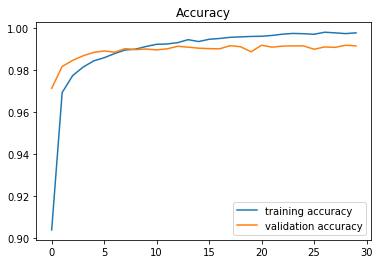

In [12]:
plot_accuracy(history)

And loss calculation:

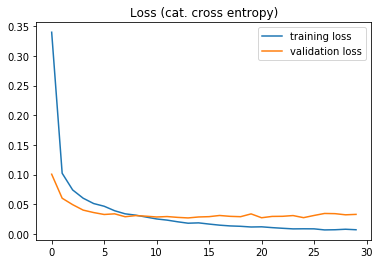

In [13]:
plot_loss(history)

For different hyperparameters:

In [14]:
num_layers= 20
kernel_size= 3
stride = 2

In [15]:
model = Sequential()
history= try_hyperparameters(model,num_layers,kernel_size,stride)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 1.03%


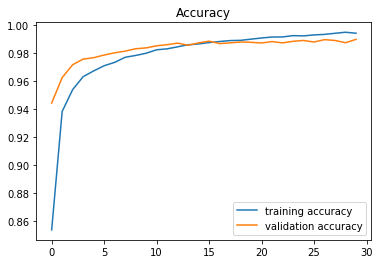

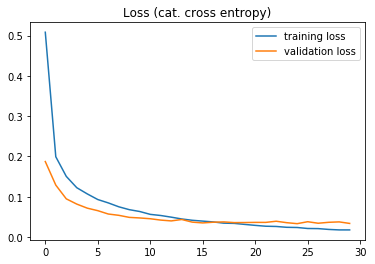

In [16]:
plot_accuracy(history)
plot_loss(history)

In [17]:
num_layers= 20
kernel_size= 7
stride = 2

In [18]:
model = Sequential()
history= try_hyperparameters(model,num_layers,kernel_size,stride)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 0.77%


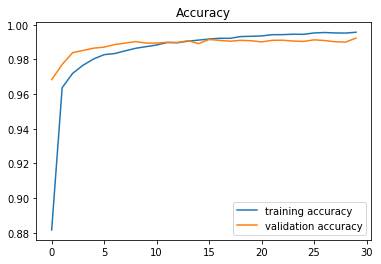

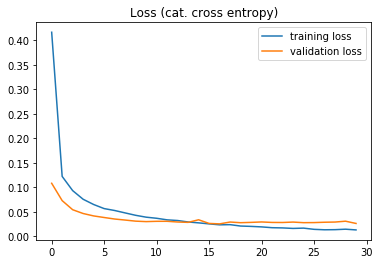

In [19]:
plot_accuracy(history)
plot_loss(history)

In [20]:
num_layers= 20
kernel_size= 10
stride = 2

In [21]:
model = Sequential()
history= try_hyperparameters(model,num_layers,kernel_size,stride)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 0.71%


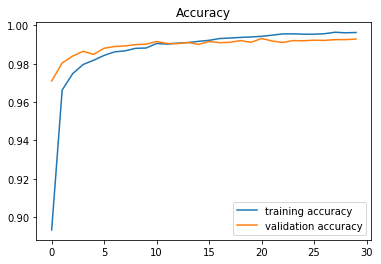

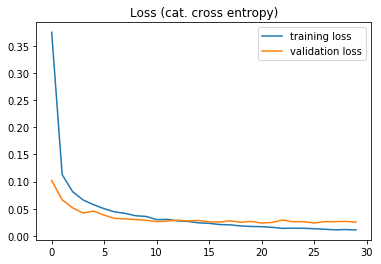

In [22]:
plot_accuracy(history)
plot_loss(history)

In [23]:
num_layers= 40
kernel_size= 10
stride = 2

In [24]:
model = Sequential()
history= try_hyperparameters(model,num_layers,kernel_size,stride)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 0.94%


In [25]:
num_layers= 30
kernel_size= 7
stride = 1

In [26]:
model = Sequential()
history= try_hyperparameters(model,num_layers,kernel_size,stride)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 0.94%


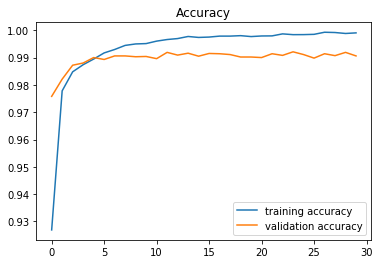

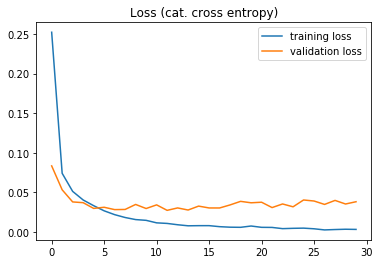

In [27]:
plot_accuracy(history)
plot_loss(history)

In [28]:
num_layers= 60
kernel_size= 20
stride = 2

In [9]:
model = Sequential()
history= try_hyperparameters(model,num_layers,kernel_size,stride)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 1.27%


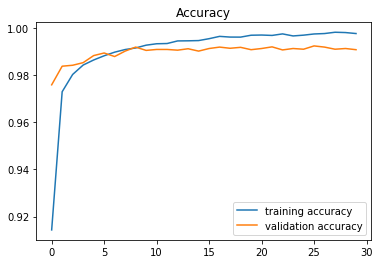

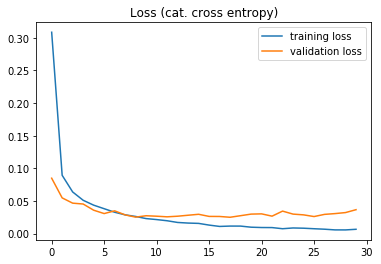

In [23]:
plot_accuracy(history)
plot_loss(history)

After several tries, we conclude that the best baseline error obtained is 0.71%, using 20 layers, a 10x10 kernel (which is a strange size, but in this case is useful for us because we obtain better results than using a 7x7 kernel) and 2 strides.  If we continue increasing the number of layers an overfitting may happen, improving the results in the training set but decreasing in validation and test.